<a href="https://colab.research.google.com/github/sravanreddy69/student-portfolio/blob/main/student_mental_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('/content/student_health_data.csv')

In [ ]:
df.head()

,Student_ID,Age,Gender,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level
0,1,24,M,50.663217,122.173015,84.419860,3.137350,9.028669,High,Moderate,Happy,34.520973,16.800956,Moderate
1,2,21,F,57.926042,110.778407,75.696145,3.699078,5.819697,Moderate,Good,Stressed,16.763846,15.791154,Moderate
2,3,22,M,59.294219,109.375673,83.803814,6.785156,5.892360,Low,Moderate,Happy,44.203798,25.678437,Moderate
3,4,24,M,76.826232,125.142227,78.091587,6.408509,6.884001,High,Poor,Happy,21.776645,20.808391,High
4,5,20,M,68.342769,107.515592,80.674937,7.264719,4.483450,Moderate,Poor,Happy,8.964999,15.194045,Moderate


In [ ]:
df.shape


(1000, 14)

**DATA** **PREPROCESSING**

In [ ]:
df.head(10)

,Student_ID,Age,Gender,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level
0,1,24,M,50.663217,122.173015,84.419860,3.137350,9.028669,High,Moderate,Happy,34.520973,16.800956,Moderate
1,2,21,F,57.926042,110.778407,75.696145,3.699078,5.819697,Moderate,Good,Stressed,16.763846,15.791154,Moderate
2,3,22,M,59.294219,109.375673,83.803814,6.785156,5.892360,Low,Moderate,Happy,44.203798,25.678437,Moderate
3,4,24,M,76.826232,125.142227,78.091587,6.408509,6.884001,High,Poor,Happy,21.776645,20.808391,High
4,5,20,M,68.342769,107.515592,80.674937,7.264719,4.483450,Moderate,Poor,Happy,8.964999,15.194045,Moderate
5,6,22,M,61.744152,90.000000,84.450865,4.262518,6.825001,Moderate,Good,Happy,44.948229,15.651195,Moderate
6,7,22,F,93.097228,106.677782,76.499815,8.415979,1.402915,Moderate,Moderate,Happy,10.269850,23.818096,Moderate
7,8,24,F,63.361031,115.396783,70.039502,2.836789,1.486429,Low,Good,Neutral,39.641788,19.315439,Low
8,9,19,F,81.671029,142.820977,74.676877,5.221367,5.115074,Moderate,Moderate,Neutral,37.211195,8.854986,Moderate
9,10,20,M,86.211086,112.635938,91.951392,8.208448,5.946601,Moderate,Moderate,Happy,33.195541,19.744741,Moderate


In [ ]:
df.dtypes

,0
Student_ID,int64
Age,int64
Gender,object
Heart_Rate,float64
Blood_Pressure_Systolic,float64
Blood_Pressure_Diastolic,float64
Stress_Level_Biosensor,float64
Stress_Level_Self_Report,float64
Physical_Activity,object
Sleep_Quality,object


In [ ]:
df.isnull().sum()

,0
Student_ID,0
Age,0
Gender,0
Heart_Rate,0
Blood_Pressure_Systolic,0
Blood_Pressure_Diastolic,0
Stress_Level_Biosensor,0
Stress_Level_Self_Report,0
Physical_Activity,0
Sleep_Quality,0


In [ ]:
df['Physical_Activity'].value_counts()

,count
Physical_Activity,
Moderate,491
Low,302
High,207


In [ ]:
lst=df['Physical_Activity'].value_counts()

<Axes: title={'center': 'Physical Quality Distribution'}, ylabel='count'>

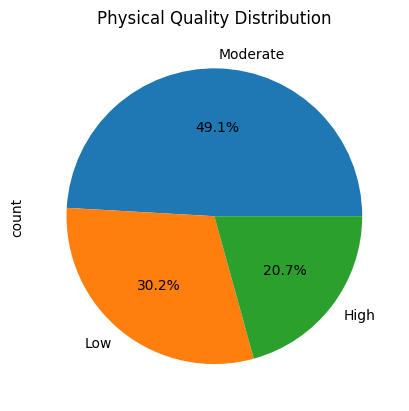

In [ ]:
plt.title("Physical Quality Distribution")
lst.plot(kind='pie',autopct='%1.1f%%')

In [ ]:
lst1=df['Sleep_Quality'].value_counts()

Text(0.5, 1.0, ' Distributio of Sleep Quality')

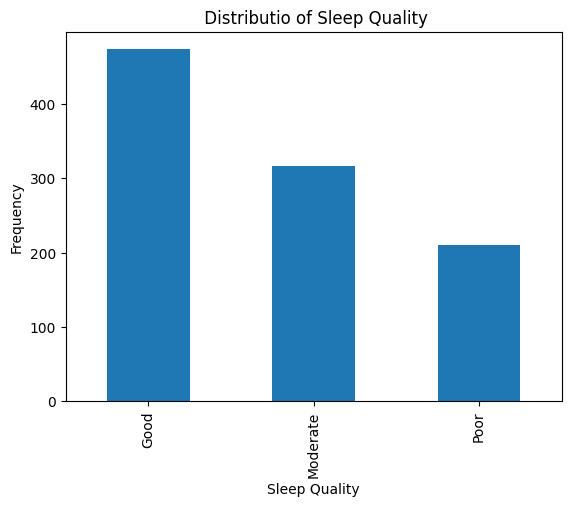

In [ ]:
lst1.plot(kind='bar')
plt.xlabel("Sleep Quality")
plt.ylabel("Frequency")
plt.title(' Distributio of Sleep Quality')

In [ ]:
lst2=df['Mood'].value_counts()

Text(0, 0.5, '')

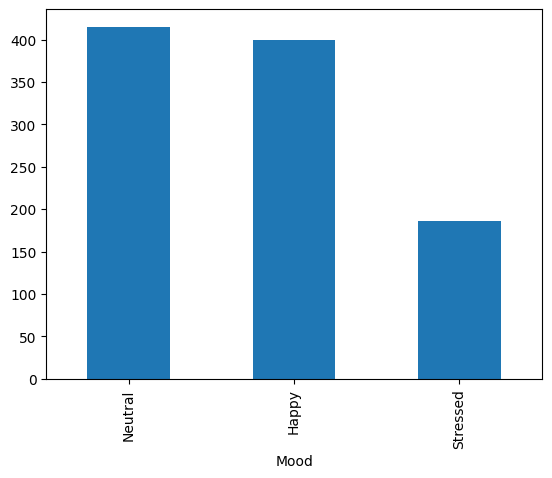

In [ ]:
lst2.plot(kind='bar')
plt.xlabel("Mood")
plt.ylabel("")

In [ ]:
df.describe()

,Student_ID,Age,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Study_Hours,Project_Hours
count,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,20.9600,70.101863,119.835380,79.854756,5.483909,5.361601,30.227037,14.887368
std,288.819436,2.0036,9.544663,14.604307,9.641699,2.596108,2.550382,10.341060,4.888624
min,1.000000,18.0000,50.000000,90.000000,60.000000,1.008491,1.002186,5.000000,0.000000
25%,250.750000,19.0000,63.347970,109.386868,73.115420,3.270567,3.172409,23.262704,11.573503
50%,500.500000,21.0000,70.330916,120.051654,79.651738,5.368891,5.234889,30.432767,14.765873
75%,750.250000,23.0000,76.425149,130.397799,86.535640,7.674233,7.471178,37.245193,18.159167
max,1000.000000,24.0000,99.650104,165.929204,107.659796,9.994153,9.964115,60.000000,32.720325


**Outlier Detection**

In [ ]:
mask = pd.Series(True, index=df.index)
for col in df.columns:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        mask &= (df[col] >= lower_bound) & (df[col] <= upper_bound)

df_cleaned = df[mask]

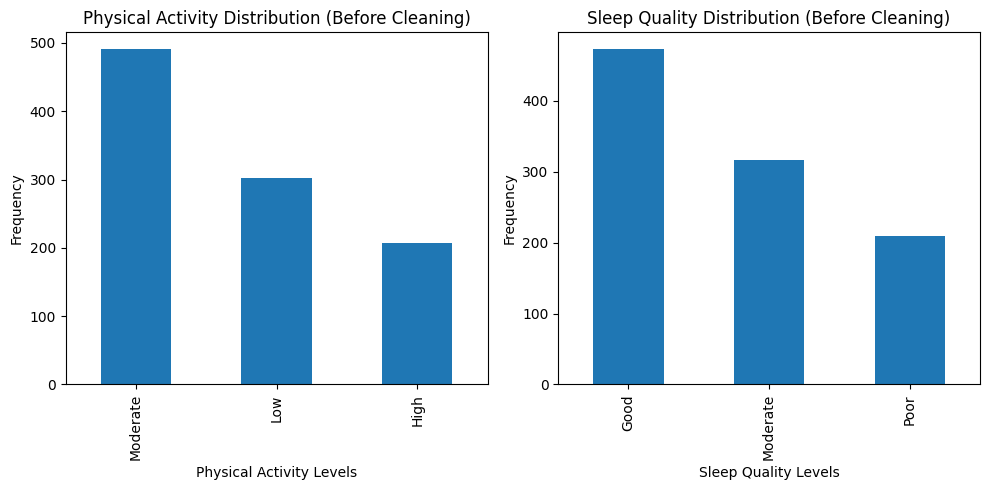

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['Physical_Activity'].value_counts().plot(kind='bar')
plt.title('Physical Activity Distribution (Before Cleaning)')
plt.xlabel('Physical Activity Levels')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
df['Sleep_Quality'].value_counts().plot(kind='bar')
plt.title('Sleep Quality Distribution (Before Cleaning)')
plt.xlabel('Sleep Quality Levels')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

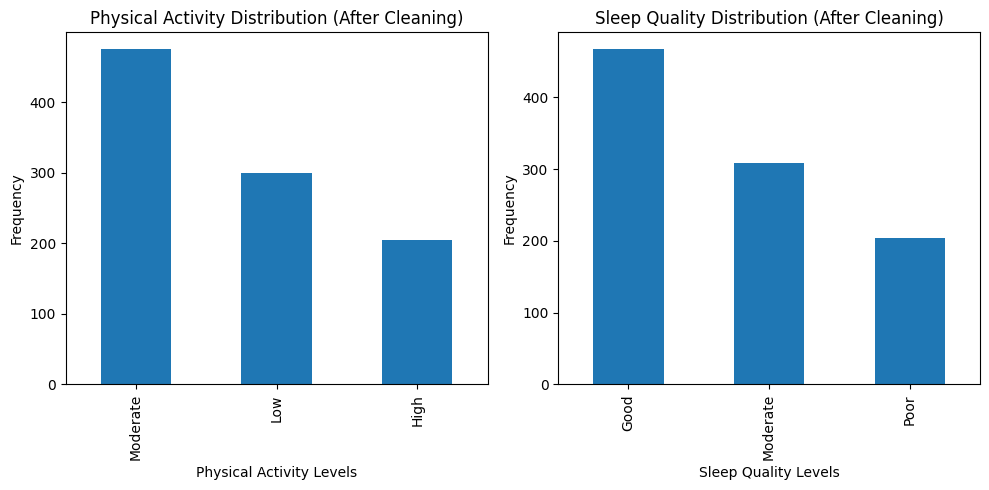

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df_cleaned['Physical_Activity'].value_counts().plot(kind='bar')
plt.title('Physical Activity Distribution (After Cleaning)')
plt.xlabel('Physical Activity Levels')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df_cleaned['Sleep_Quality'].value_counts().plot(kind='bar')
plt.title('Sleep Quality Distribution (After Cleaning)')
plt.xlabel('Sleep Quality Levels')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
df_cleaned.shape

(979, 14)

In [ ]:
df1=df_cleaned

**Label Encoder**

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in df1.columns:
    if df1[col].dtype =='object':
        df1[col] = label_encoder.fit_transform(df1[col])

<ipython-input-47-5018a2ef19b6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = label_encoder.fit_transform(df1[col])
<ipython-input-47-5018a2ef19b6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = label_encoder.fit_transform(df1[col])
<ipython-input-47-5018a2ef19b6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [ ]:
df1.dtypes

,0
Student_ID,int64
Age,int64
Gender,int64
Heart_Rate,float64
Blood_Pressure_Systolic,float64
Blood_Pressure_Diastolic,float64
Stress_Level_Biosensor,float64
Stress_Level_Self_Report,float64
Physical_Activity,int64
Sleep_Quality,int64


**Splitting the Dataset**

In [ ]:
y = df1['Health_Risk_Level']
x = df1.drop(['Student_ID', 'Health_Risk_Level'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

**Feature Selection**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
selector = SelectKBest(score_func=f_classif, k=3)
x_new = selector.fit_transform(x_train, y_train)
selected_columns = x_train.columns[selector.get_support()]

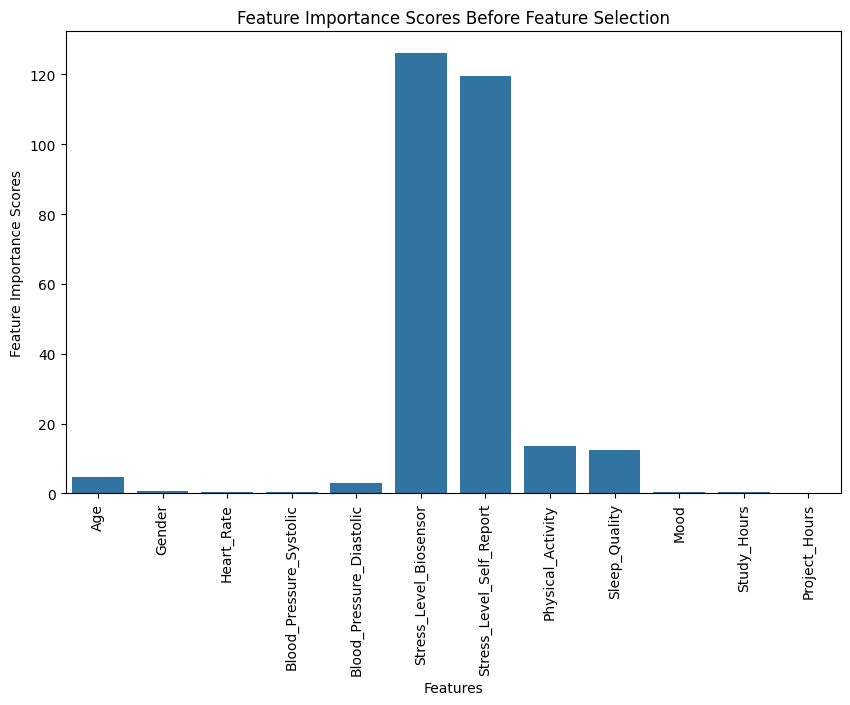

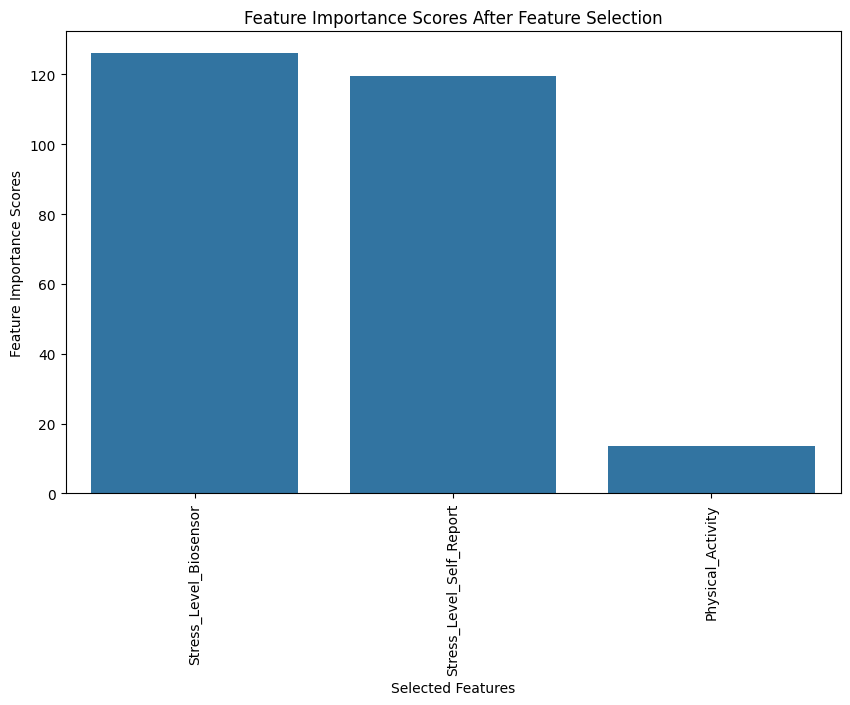

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=x_train.columns, y=selector.scores_)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance Scores')
plt.title('Feature Importance Scores Before Feature Selection')
plt.show()
plt.figure(figsize=(10, 6))
sns.barplot(x=selected_columns, y=selector.scores_[selector.get_support()])
plt.xticks(rotation=90)
plt.xlabel('Selected Features')
plt.ylabel('Feature Importance Scores')
plt.title('Feature Importance Scores After Feature Selection')
plt.show()

**Model Performance**

In [ ]:
model = LogisticRegression()
model.fit(x_new, y_train)
x_test_new = selector.transform(x_test)
y_pred = model.predict(x_test_new)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8367346938775511
Confusion Matrix:
 [[ 17   1  27]
 [  0  43  12]
 [  3   5 186]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.38      0.52        45
           1       0.88      0.78      0.83        55
           2       0.83      0.96      0.89       194

    accuracy                           0.84       294
   macro avg       0.85      0.71      0.75       294
weighted avg       0.84      0.84      0.82       294



**SVM Implementation**

In [ ]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='linear', C=1.0, random_state=42)
svm_clf.fit(x_new, y_train)
x_test_new = selector.transform(x_test)
y_pred = svm_clf.predict(x_test_new)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8299319727891157
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.42      0.57        45
           1       0.81      0.78      0.80        55
           2       0.83      0.94      0.88       194

    accuracy                           0.83       294
   macro avg       0.84      0.71      0.75       294
weighted avg       0.83      0.83      0.82       294



**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(x_new, y_train)
y_pred = rf_clf.predict(x_test_new)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9319727891156463

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.64      0.76        45
           1       0.90      0.96      0.93        55
           2       0.94      0.99      0.96       194

    accuracy                           0.93       294
   macro avg       0.92      0.87      0.89       294
weighted avg       0.93      0.93      0.93       294

